# Exercise 2 – Analysis of UC Admissions

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with the dataset from UC Admissions. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [3]:
x <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 2 - Analyzing UC Admissions/AdmissionsData.csv")

In [5]:
# Find some patterns
dim(x)
head(x)
str(x)
names(x)

[1] 4425    3

Department,Sex,Admitted
Biology,M,Yes
Biology,M,Yes
Biology,M,Yes
Biology,M,Yes
Biology,M,Yes
Biology,M,Yes


'data.frame':	4425 obs. of  3 variables:
 $ Department: Factor w/ 6 levels "Biology","English",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Sex       : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ Admitted  : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...


[1] "Department" "Sex"        "Admitted"

## Step 1: What was the overall acceptance rate for male vs female applicants?

In [13]:
# Calculate the total number of males that have been accepted

acceptance_male_number <- sum(x$Sex == "M" & x$Admitted == "Yes", na.rm = TRUE)

# Make sure that non binary genders are filtered and then calculate total
acceptance_total <- sum(x$Sex == "F" | x$Sex == "M", na.rm = TRUE)

# Find the overall percentage rate of males
percentage_male <- acceptance_male_number / acceptance_total * 100
print(paste("percentage male out of ALL applicants:", percentage_male))

# Calculate the total number of females that have been accepted
acceptance_female_number <- sum(x$Sex == "F" & x$Admitted == "Yes", na.rm = TRUE)

# Find the overall percentage rate of females
percentage_female <- acceptance_female_number / acceptance_total * 100
print(paste("percentage female out of ALL applicants:", percentage_female))

[1] "percentage male out of ALL applicants: 26.9378531073446"
[1] "percentage female out of ALL applicants: 12.5875706214689"


In [15]:
# ALTERNATIVELY, there is a simpler way to approach this question

# Using a table, you can easily compare the differences

table(x$Sex, x$Admitted)

# From here. pluck the numbers as required.

   
      No  Yes
  F 1278  557
  M 1398 1192

We may be seeing some discrimination here against females, but more analysis is necessary to show causation rather than correlation.

## Step 2: Give your own take. Is there a significant difference or not?

In [16]:
# There could be significant discrimination, but more evidence is necessary

# It is important to note that there are 800 more male applicants than females

# This means that results could potentially be skewed

# The calculations for the total number of males and females is below.

table(x$Sex)


   F    M 
1835 2590 

## Is there any particular department that seems especially problematic in terms of differential admission rates?

First, find the male and female admission rates for each department.

In [22]:
#Create a table for all the students that were rejected

x_table <- table(x$Department, x$Sex)
x_table

y <- x[x$Admitted == "No", ]

             
                F   M
  Biology     341 272
  English     393 191
  History     375 417
  Mathematics 108 825
  Philosophy   25 560
  Psychology  593 325

In [21]:
# Create a table for all the students that were rejected

y <- x[x$Admitted == "No", ]

y_table <- table(y$Department, y$Sex)
y_table

             
                F   M
  Biology     317 256
  English     299 138
  History     244 278
  Mathematics  19 314
  Philosophy    8 207
  Psychology  391 205

In [24]:
# Create an empty dataframe with the subjects

df <- data.frame(matrix(ncol = 2, nrow = 6))

# Create the row names and input into empty dataframe
row_names <- c("Biology", "English", "History", "Mathematics", "Philosophy", "Psychology")
rownames(df) <- row_names

# Create the column names and input into empty dataframe
col_names <- c("F", "M")
colnames(df) <- col_names

# to find the issue for females
for (i in 1:6) {
  female_rejection_rates <- y_table[i, "F"] / x_table[i, "F"] * 100
  df$F[i] <- female_rejection_rates
}

# to find the issue for males
for (i in 1:6) {
  male_rejection_rates <- y_table[i, "M"] / x_table[i, "M"] * 100
  df$M[i] <- male_rejection_rates
}

df

,F,M
Biology,92.96188,94.11765
English,76.08142,72.25131
History,65.06667,66.66667
Mathematics,17.59259,38.06061
Philosophy,32.00000,36.96429
Psychology,65.93592,63.07692


In [27]:
# There is an alternative way to do it, a simpler way without loops

table(x[x$Admitted == "No", ]$Department,
     x[x$Admitted == "No", ]$Sex) / table(x$Department, x$Sex) * 100

             
                     F        M
  Biology     92.96188 94.11765
  English     76.08142 72.25131
  History     65.06667 66.66667
  Mathematics 17.59259 38.06061
  Philosophy  32.00000 36.96429
  Psychology  65.93592 63.07692

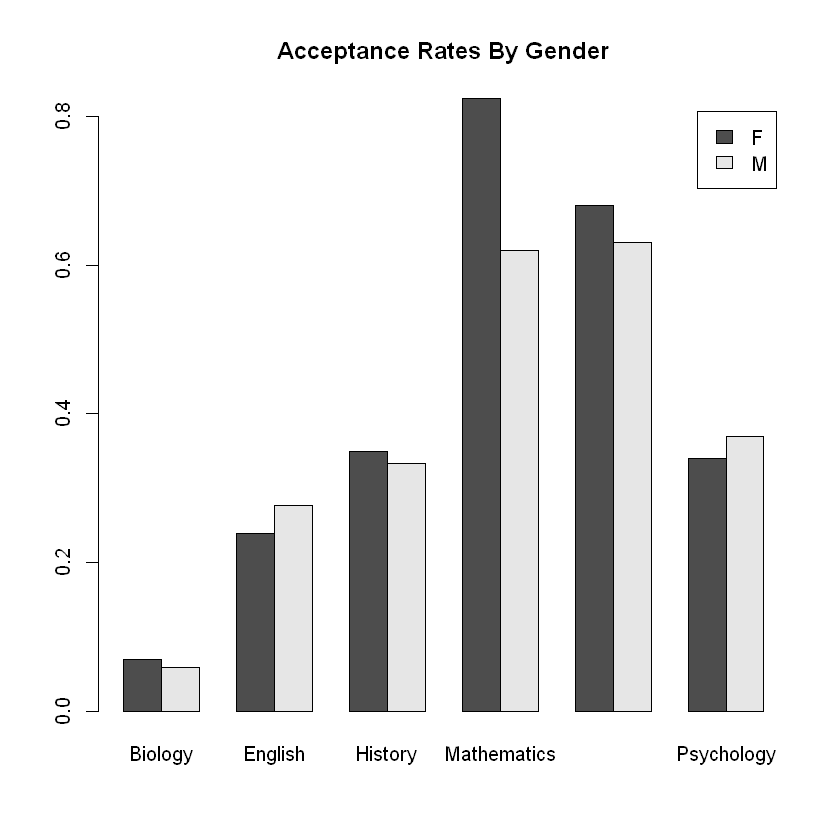

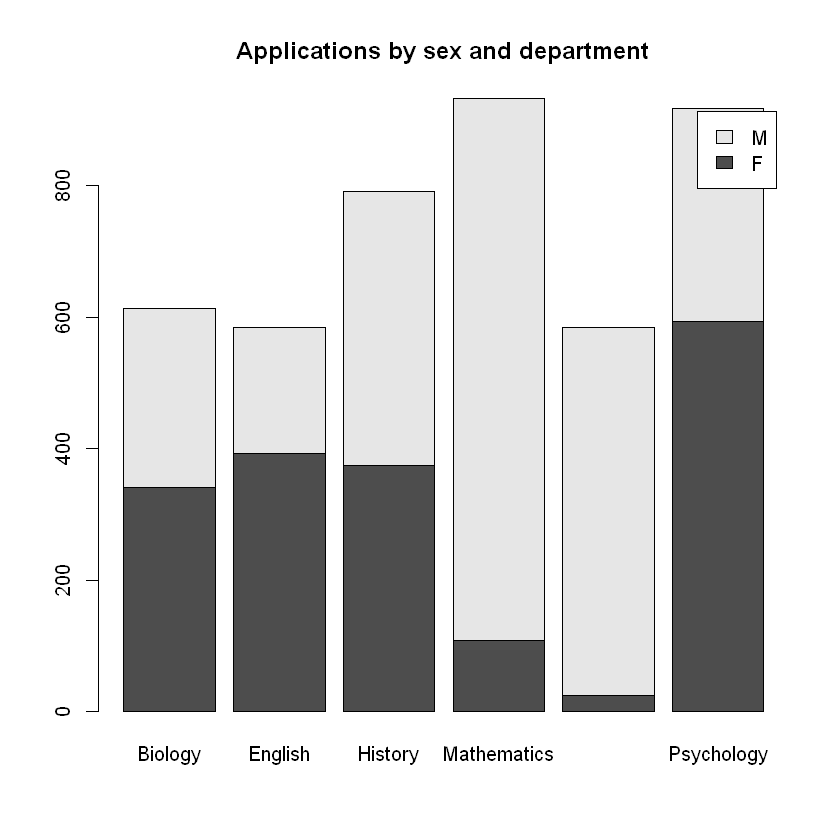

In [29]:
# You can use a graph to visualize the data

barplot(table(x[x$Admitted == "Yes", ]$Sex, 
              x[x$Admitted == "Yes", ]$Department)/table(x$Sex, x$Department), 
        beside = TRUE, 
        legend = TRUE, 
        main = "Acceptance Rates By Gender")

barplot(table(x$Sex, x$Department), 
        legend = TRUE, 
        main = "Applications by sex and department")


### Step 4: Is there evidence for sex-based discrimination?

In [31]:
# Based on the data, it seems that there could be discrimination against males.

# This happens in Mathematics.

# Given the double amount of acceptances by females compared to males.

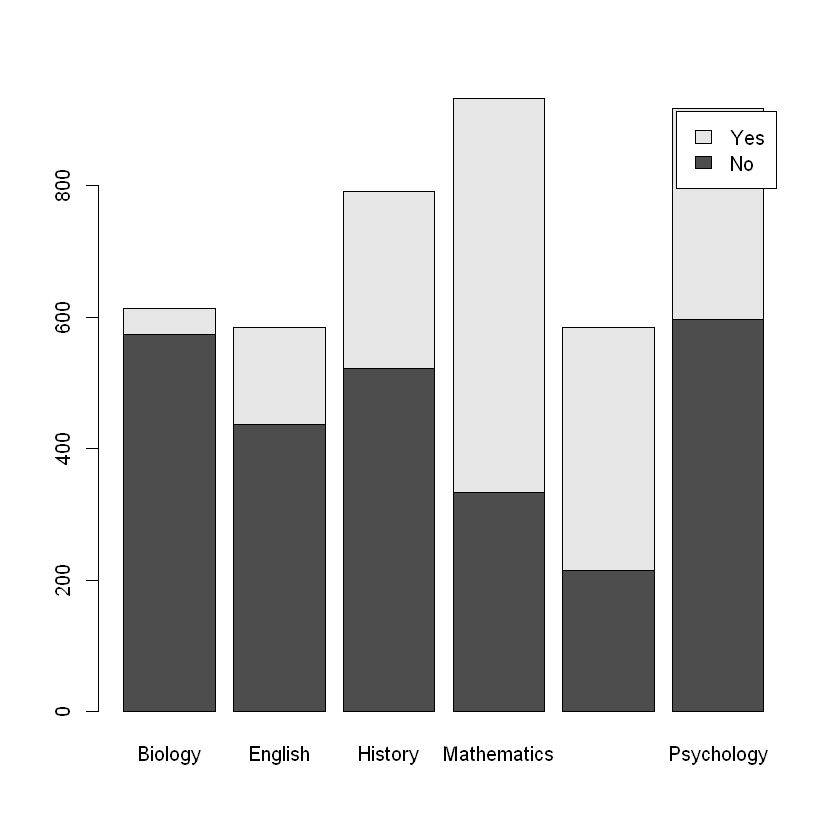

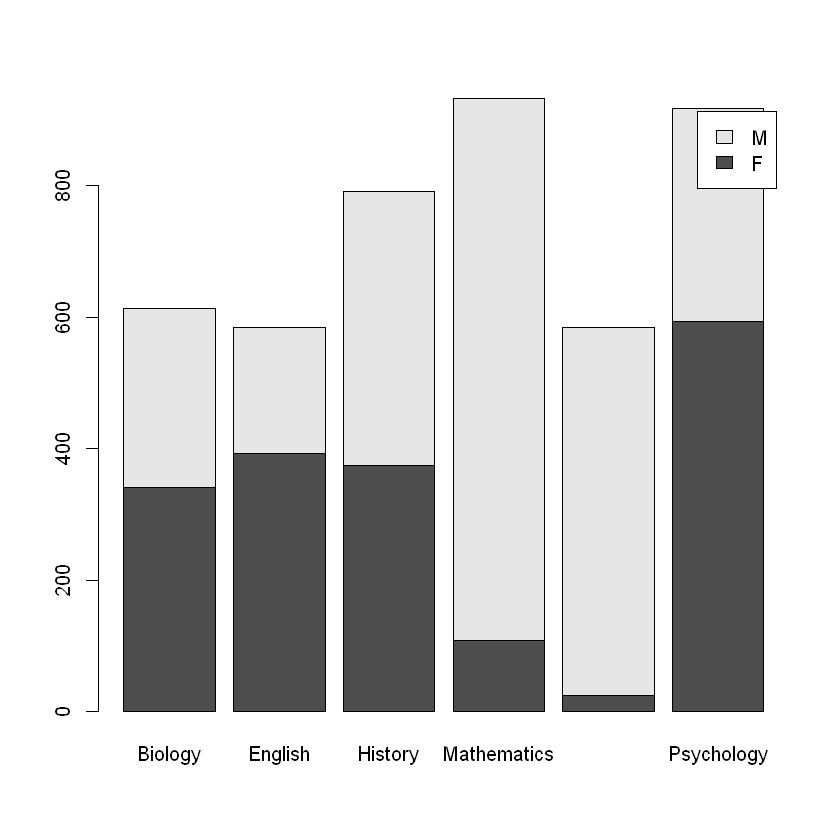

In [34]:
# Based on analysis, it seems that females also apply to more competitive fields

barplot(table(x$Admitted, x$Department), legend = TRUE)

# Biology is extremely competitive here, as is English and maybe Psychology

barplot(table(x$Sex, x$Department), legend = TRUE)

# On the other hand, males are overrepresented in easier fields such as:
# > Mathematics
# > Philosophy